### Import relevant libraries (ALWAYS EXECUTE CELL BELOW...OBVS!)

In [1]:
import tweepy
from tweepy import OAuthHandler
import json
from collections import Counter
import pandas as pd
from datetime import datetime
%matplotlib inline

# 1) Capturing Charity Tech 2017 tweets (One-time use)

### Authenticate credentials

In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [ ]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

### Method to convert tweet to string to further processing

In [ ]:
def process_or_store(tweet):
    return json.dumps(tweet)

### Get and store tweets with the "#charitytech17" in them

In [ ]:
count = 0
with open('charitytech17.json', 'a') as f:
    for tweet in tweepy.Cursor(api.search,q="#charitytech17",count=100,lang="en", since_id="2017-11-09").items():
        a = process_or_store(tweet._json)
        f.write(a)

        count = count + 1

#### Total number of tweets captured: 601

In [ ]:
count

# 2) Process charity tech tweets (One-time use)

### Method to read in tweets from file to allow further processing

In [ ]:
def process_tweets(filename):
    with open(filename) as inp:
        s = inp.read().strip()

    jsons = []

    start, end = s.find('{'), s.find('}')
    while True:
        try:
            jsons.append(json.loads(s[start:end + 1]))
        except ValueError:
            end = end + 1 + s[end + 1:].find('}')
        else:
            s = s[end + 1:]
            if not s:
                break
            start, end = s.find('{'), s.find('}')

    return jsons

### Filter out retweets (One-time use)

In [ ]:
jsons = process_tweets('charitytech17.json')

In [ ]:
count = 0
for line in jsons:
    
     if 'retweeted_status' not in line:
        
        count = count + 1
        with open('charitytech17_original.json', 'a') as g:
            g.write(json.dumps(line))

In [ ]:
print('Number of tweets: ', count)

In [ ]:
# double check the number of original tweets is correct
count = 0

for line in jsons:
    
    if 'retweeted_status' in line:
        count = count + 1

In [ ]:
print('Number of retweets: ', count)

# 3) Dataset to be used (Start here if tweets already captured and filtered)

In [2]:
def process_tweets(filename):
    with open(filename) as inp:
        s = inp.read().strip()

    jsons = []

    start, end = s.find('{'), s.find('}')
    while True:
        try:
            jsons.append(json.loads(s[start:end + 1]))
        except ValueError:
            end = end + 1 + s[end + 1:].find('}')
        else:
            s = s[end + 1:]
            if not s:
                break
            start, end = s.find('{'), s.find('}')

    return jsons

In [3]:
jsons = process_tweets('charitytech17_original.json')

# Analysing charity tech 2017 tweets

To analyse:
* total number of tweets captured
* top 10 hashtags
* most retweeted tweet
* most favourited tweet
* most user mentions
* tweet timeline

## Total number of tweets captured

In [4]:
print(len(jsons))

397


## Top 10 hashtags

In [5]:
all_hashtags = []

for line in jsons:
    
    # extract hashtags from tweet json
    hashtags = line['entities']['hashtags']
    
    # add all hashtags found into a list
    for tag in hashtags:
        text = tag['text'].lower()
        all_hashtags.append(text)

In [6]:
# convert list to type Counter for counting
z = all_hashtags
z = Counter(z)

In [7]:
# print n most frequent hashtags
n = 10
z.most_common(n)

[('charitytech17', 282),
 ('charities', 9),
 ('bgsummit', 5),
 ('thursdaythoughts', 5),
 ('blockchain', 5),
 ('digital', 5),
 ('neonicotinoids', 4),
 ('vr', 3),
 ('charity', 3),
 ('crm', 3)]

## Most retweeted tweet

In [8]:
count = 0
name = ""
screen_name = ""
tweet = ""
retweets = ""

for line in jsons:
    retweet_count = line['retweet_count']
    
    # get new tweet data if new retweet count is higher than the existing one
    if retweet_count > count:
        name = line['user']['name']
        screen_name = line['user']['screen_name']
        tweet = line['text']
        retweets = retweet_count
        
        count = retweet_count

In [9]:
# display tweet with highest retweet count
print('Name: ', name)
print('Screen Name: ', screen_name)
print('Tweet: ', tweet)
print('Number of retweets: ', retweets)

Name:  Mandy Johnson
Screen Name:  MsMandyJ
Tweet:  Top tips from @DocJaneCollins for #DigitalTransformation 

1. Don't call it transformation
2. Don't enforce change… https://t.co/LUUGjaSU4O
Number of retweets:  48


## Most favorited tweet

In [10]:
count = 0
name = ""
screen_name = ""
tweet = ""
favorites = ""

for line in jsons:
    favorite_count = line['favorite_count']
    
    # get new tweet data if new favorite count is higher than the existing one
    if favorite_count > count:
        name = line['user']['name']
        screen_name = line['user']['screen_name']
        tweet = line['text']
        favorites = favorite_count
        
        count = favorite_count

In [11]:
# display tweet with highest favorite count
print('Name: ', name)
print('Screen Name: ', screen_name)
print('Tweet: ', tweet)
print('Number of favorites: ', favorites)

Name:  Mandy Johnson
Screen Name:  MsMandyJ
Tweet:  Top tips from @DocJaneCollins for #DigitalTransformation 

1. Don't call it transformation
2. Don't enforce change… https://t.co/LUUGjaSU4O
Number of favorites:  53


## Most user mentions

In [12]:
names = []

for line in jsons:
    mentions = line['entities']['user_mentions']
    
    # gather all users mentioned into a one list
    for user in mentions:
        name = user['name'] + ": @" + user['screen_name']
        names.append(name)

In [13]:
# convert list into type Counter for counting
y = names
y = Counter(y)

In [14]:
# print n most frequently mentioned users
n = 10
y.most_common(n)

[('Marie Curie: @mariecurieuk', 29),
 ('Nightstop: @DepaulNightstop', 22),
 ('Civil Society: @CivilSocietyUK', 21),
 ('Dr. Jane Collins: @DocJaneCollins', 14),
 ('Jo Wolfe (Kerr): @msjowolfe', 13),
 ('Stephen Armstrong: @smdarmstrong', 13),
 ('Ian Williamson: @betteriser', 10),
 ('NicolaHarwood: @NicolaHarwood', 9),
 ('RoyalTrinityHospice: @trinityhospice', 9),
 ('Rhodri Davies  ☕️: @Rhodri_H_Davies', 8)]

## Charity tech tweets timeline

In [15]:
tweet_dates = []

# store datetime of all tweets for plotting
for line in jsons:
    tweet_dates.append(line['created_at'])

In [16]:
# assign 1 for each tweet to allow grouping later one
ones = [1] * len(tweet_dates)

# use tweet datetime as index of series
idx = pd.DatetimeIndex(tweet_dates)

# create Series with tweet datetime as index and 1's for grouping
ctech = pd.Series(ones, index=idx)

# group tweets by day
per_day = ctech.resample('1440T').sum().fillna(0)

In [17]:
per_day

2017-11-02      2.0
2017-11-03      0.0
2017-11-04      0.0
2017-11-05      0.0
2017-11-06      2.0
2017-11-07      4.0
2017-11-08     13.0
2017-11-09    364.0
2017-11-10     12.0
Freq: 1440T, dtype: float64

### Tweet activity between 02 Nov - 10 Nov

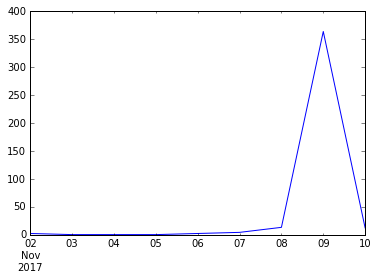

In [18]:
per_day.plot.line()

### Tweet activity on 9 Nov

In [19]:
start = datetime.strptime('Thu Nov 09 00:00:00 +0000 2017', '%a %b %d %H:%M:%S %z %Y')
end = datetime.strptime('Thu Nov 09 23:59:59 +0000 2017', '%a %b %d %H:%M:%S %z %Y')

nov9_tweet_dates = []

for line in jsons:
    datetime_object = datetime.strptime(line['created_at'], '%a %b %d %H:%M:%S %z %Y')
    
    # store tweets in a list which were tweeted on 9 November (day of conference)
    if start <= datetime_object <= end:
        nov9_tweet_dates.append(line['created_at'])

In [20]:
# assign 1 for each tweet to allow grouping later one
ones = [1] * len(nov9_tweet_dates)

# use tweet datetime as index of series
idx = pd.DatetimeIndex(nov9_tweet_dates)

# create Series with tweet datetime as index and 1's for grouping
ctech = pd.Series(ones, index=idx)

# group tweets by minute
per_minute = ctech.resample('10T').sum().fillna(0)

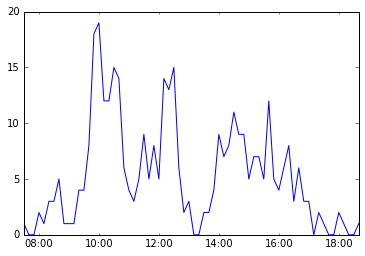

In [21]:
%matplotlib inline

per_minute.plot.line()